## This notebook deals with analyzing the dataset provided


In [1]:
import pandas as pd

In [2]:
train_vehicle = pd.read_csv("data/train_vehicle.csv")
train_person = pd.read_csv("data/train_person.csv")
train_accident = pd.read_csv("data/train_accident.csv")

In [3]:
print(train_vehicle.shape)
train_vehicle.head()

(80224, 60)


,CASENUM,VIN,WEIGHT,HAZM_NO,MODEL_YR,DAM_AREA,DR_ZIP_C,C_ID_NO,REGION,HIT_RUN,...,BDYTYP_H,V_EVNT_H,HITRUN_I,MANEUV_I,VLTN_I,MDLYR_I,NUM_INJV,MXVSEV_I,NUMINJ_I,V_ALCH_I
0,110215644,99999999999,271.460,0,2000,13000,12456,0,1,0,...,9,24,0,1,0,2000,0,0,0,2
1,110215646,99999999999,81.438,0,1988,10000,12477,0,1,0,...,20,25,0,1,0,1988,1,2,1,2
2,110215646,99999999999,81.438,0,1992,13000,12401,0,1,0,...,9,25,0,4,0,1992,2,3,2,2
3,110215656,99999999999,246.404,0,1993,24000,12589,0,1,0,...,4,25,0,5,0,1993,0,0,0,2
4,110215656,99999999999,246.404,0,1987,10000,12561,0,1,0,...,4,25,0,2,0,1987,0,0,0,2


In [4]:
print(train_person.shape)
train_person.head()

(114486, 28)


,CASENUM,PERNO,VEHNO,AGE_H,SEX_H,INJSEV_H,SEAT_H,PERALC_H,WEIGHT,PER_TYPE,...,IMPAIRMT,ACTION,SAF_EQMT,AIRBAG,REGION,AGE,PJ,PSU,STR_VEH,EJECT_I
0,110215644,1,1,46,2,0,11,1,271.460,1,...,0,0,0,9,1,46,2,2,0,0
1,110215644,2,1,70,2,0,13,0,271.460,2,...,0,0,0,9,1,70,2,2,0,0
2,110215646,1,1,49,1,2,11,1,81.438,1,...,0,0,0,9,1,49,2,2,0,0
3,110215646,1,2,17,1,3,11,1,81.438,1,...,2,0,0,9,1,17,2,2,0,0
4,110215646,2,2,16,1,3,13,0,81.438,2,...,0,0,0,9,1,16,2,2,0,0


In [5]:
print(train_accident.shape)
train_accident.head()

(44740, 47)


,CASENUM,HOUR_I,MINUTE_I,RELJCT_I,ALIGN_I,PROFIL_I,SURCON_I,TRFCON_I,LGTCON_I,WEATHR_I,...,PED_ACC,PJ,PSU,PSUSTRAT,SPD_LIM,VEH_INVL,YEAR,WKDY_I,NO_INJ_I,ALCHL_I
0,110215644,22,23,0,1,2,1,0,2,1,...,0,2,2,3,99,1,2001,5,0,2
1,110215646,14,44,0,1,1,1,0,1,1,...,0,2,2,3,99,2,2001,7,3,2
2,110215656,8,38,0,2,1,4,0,1,1,...,0,6,2,3,99,2,2001,3,0,2
3,110215658,15,20,2,1,1,1,0,1,1,...,0,6,2,3,99,2,2001,3,1,2
4,110215665,10,8,0,2,1,4,0,1,1,...,0,10,2,3,99,1,2001,6,3,2


#### Let's analyze individual data one by one

# For vehicle details

[]
     Feature_1 Feature_2  Correlation
353    C_ID_NO  CARG_TYP     0.770729
363    C_ID_NO     AXLES     0.792416
420     REGION  PSUSTRAT     0.917997
455    HIT_RUN   DR_PRES     0.915850
478    HIT_RUN  HITRUN_I     0.928283
573   BODY_TYP  BDYTYP_H     0.935063
963   P_CRASH1  MANEUV_I     0.977530
997   VEH_ROLE   VROLE_I     0.822583
1088  P_CRASH3  DRMAN_AV     0.867841
1224  CARG_TYP     AXLES     0.755571
1268   DR_PRES  HITRUN_I     0.970782
1299   VIOLATN    VLTN_I     0.993344
1426   V_EVENT  V_EVNT_H     0.974323
1476  MAX_VSEV  NUM_INJV     0.896809
1708  MXVSEV_I  NUMINJ_I     0.702217


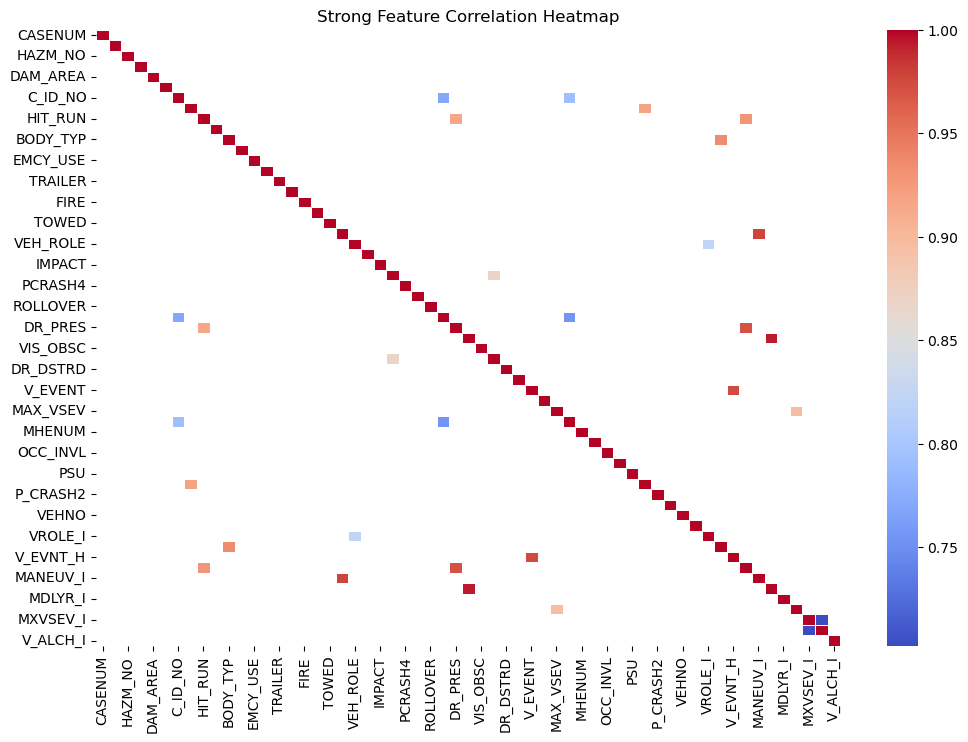

In [6]:
import pandas as pd
import numpy as np

# read the data
train_vehicle = pd.read_csv("data/train_vehicle.csv")

# check for null values
t1 = tuple(zip(list(train_vehicle.columns),list(train_vehicle.isna().sum())))
print([(col, missing) for col, missing in t1 if missing > 0])

# Drop VIN column if it exists
if 'VIN' in train_vehicle.columns:
    train_vehicle = train_vehicle.drop(columns=['VIN'])

# Convert categorical columns to numerical using encoding (if needed)
object_cols = train_vehicle.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    train_vehicle_encoded = pd.get_dummies(train_vehicle, drop_first=True)
else:
    train_vehicle_encoded = train_vehicle.copy()

# Compute correlation matrix
correlation_matrix = train_vehicle_encoded.corr()

# Filter correlations greater than 0.7 or less than -0.7 (excluding self-correlation)
correlation_threshold = 0.7
correlated_pairs = (
    correlation_matrix
    .where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Take upper triangle only
    .stack()  # Convert to Series
    .reset_index()
)

# Rename columns
correlated_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter based on threshold
strong_correlations = correlated_pairs[
    (correlated_pairs['Correlation'] > correlation_threshold) | 
    (correlated_pairs['Correlation'] < -correlation_threshold)
]

# Display results
print(strong_correlations)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a filtered correlation matrix with only strong correlations
correlation_threshold = 0.7
strong_corr_matrix = correlation_matrix[
    (correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)
].dropna(how="all", axis=0).dropna(how="all", axis=1)  # Remove rows & cols with all NaNs

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Strong Feature Correlation Heatmap")
plt.show()


In [7]:
# code to ignore correlated values 

correlated_columns = set()


for _, row in strong_correlations.iterrows():
    col1, col2 = row["Feature_1"], row["Feature_2"]
    correlated_columns.add(col2)  # Remove the second column in the pair to avoid redundancy

# Drop correlated columns from train_vehicle
train_vehicle_cleaned = train_vehicle.drop(columns=correlated_columns)

# Display remaining columns
print("Remaining columns after removing correlated ones:", train_vehicle_cleaned.columns)


Remaining columns after removing correlated ones: Index(['CASENUM', 'WEIGHT', 'HAZM_NO', 'MODEL_YR', 'DAM_AREA', 'DR_ZIP_C',
       'C_ID_NO', 'REGION', 'HIT_RUN', 'MAKE', 'BODY_TYP', 'SPEC_USE',
       'EMCY_USE', 'FACTOR', 'TRAILER', 'JACKNIFE', 'FIRE', 'VEH_SEV', 'TOWED',
       'P_CRASH1', 'VEH_ROLE', 'ACC_TYPE', 'IMPACT', 'P_CRASH3', 'PCRASH4',
       'PCRASH5', 'ROLLOVER', 'VIOLATN', 'VIS_OBSC', 'DR_DSTRD', 'SPEEDREL',
       'V_EVENT', 'VEH_ALCH', 'MAX_VSEV', 'MHENUM', 'NUMOCCS', 'OCC_INVL',
       'PJ', 'PSU', 'P_CRASH2', 'SPEED', 'VEHNO', 'IMPACT_H', 'MDLYR_I',
       'MXVSEV_I', 'V_ALCH_I'],
      dtype='object')


In [8]:
train_vehicle_cleaned.shape
train_vehicle_cleaned.to_csv("cleaned_data/vehicle.csv",index=False)

# For accident detail

In [9]:
train_accident = pd.read_csv("data/train_accident.csv")

In [10]:
# check for null values
t1 = tuple(zip(list(train_accident.columns),list(train_accident.isna().sum())))
print([(col, missing) for col, missing in t1 if missing > 0])


[]


In [11]:
train_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44740 entries, 0 to 44739
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   44740 non-null  int64  
 1   HOUR_I    44740 non-null  int64  
 2   MINUTE_I  44740 non-null  int64  
 3   RELJCT_I  44740 non-null  int64  
 4   ALIGN_I   44740 non-null  int64  
 5   PROFIL_I  44740 non-null  int64  
 6   SURCON_I  44740 non-null  int64  
 7   TRFCON_I  44740 non-null  int64  
 8   LGTCON_I  44740 non-null  int64  
 9   WEATHR_I  44740 non-null  int64  
 10  MANCOL_I  44740 non-null  int64  
 11  EVENT1_I  44740 non-null  int64  
 12  WEIGHT    44740 non-null  float64
 13  MONTH     44740 non-null  int64  
 14  WEEKDAY   44740 non-null  int64  
 15  REGION    44740 non-null  int64  
 16  LAND_USE  44740 non-null  int64  
 17  MAN_COL   44740 non-null  int64  
 18  INT_HWY   44740 non-null  int64  
 19  REL_JCT   44740 non-null  int64  
 20  REL_RWY   44740 non-null  in

In [12]:
# Compute correlation matrix
correlation_matrix = train_accident.corr()

# Filter correlations greater than 0.7 or less than -0.7 (excluding self-correlation)
correlation_threshold = 0.7
correlated_pairs = (
    correlation_matrix
    .where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Take upper triangle only
    .stack()  # Convert to Series
    .reset_index()
)

# Rename columns
correlated_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter based on threshold
strong_correlations = correlated_pairs[
    (correlated_pairs['Correlation'] > correlation_threshold) | 
    (correlated_pairs['Correlation'] < -correlation_threshold)
]

# Display results
print(strong_correlations)


    Feature_1 Feature_2  Correlation
120  MINUTE_I    MINUTE     0.959697
147  RELJCT_I   REL_JCT     0.719511
272  SURCON_I  SUR_COND     0.714381
311  TRFCON_I  TRAF_CON     0.985295
349  LGTCON_I  LGHT_CON     0.789596
411  MANCOL_I   MAN_COL     0.988994
460  EVENT1_I    EVENT1     0.974252
567   WEEKDAY    WKDY_I     1.000000
594    REGION  PSUSTRAT     0.921823


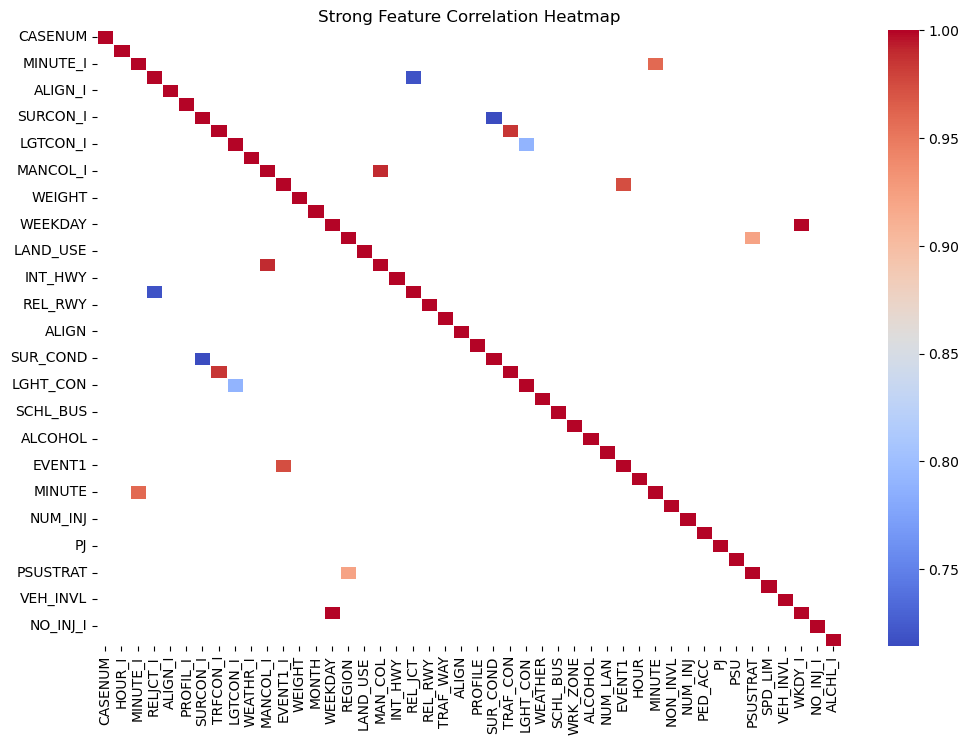

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a filtered correlation matrix with only strong correlations
correlation_threshold = 0.7
strong_corr_matrix = correlation_matrix[
    (correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)
].dropna(how="all", axis=0).dropna(how="all", axis=1)  # Remove rows & cols with all NaNs

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Strong Feature Correlation Heatmap")
plt.show()


In [14]:
# code to ignore correlated values 

correlated_columns = set()


for _, row in strong_correlations.iterrows():
    col1, col2 = row["Feature_1"], row["Feature_2"]
    correlated_columns.add(col2)  # Remove the second column in the pair to avoid redundancy

# Drop correlated columns from train_vehicle
train_accident_cleaned = train_accident.drop(columns=correlated_columns)

# Display remaining columns
print("Remaining columns after removing correlated ones:", train_accident_cleaned.columns)


Remaining columns after removing correlated ones: Index(['CASENUM', 'HOUR_I', 'MINUTE_I', 'RELJCT_I', 'ALIGN_I', 'PROFIL_I',
       'SURCON_I', 'TRFCON_I', 'LGTCON_I', 'WEATHR_I', 'MANCOL_I', 'EVENT1_I',
       'WEIGHT', 'MONTH', 'WEEKDAY', 'REGION', 'LAND_USE', 'INT_HWY',
       'REL_RWY', 'TRAF_WAY', 'ALIGN', 'PROFILE', 'WEATHER', 'SCHL_BUS',
       'WRK_ZONE', 'ALCOHOL', 'NUM_LAN', 'HOUR', 'NON_INVL', 'NUM_INJ',
       'PED_ACC', 'PJ', 'PSU', 'SPD_LIM', 'VEH_INVL', 'YEAR', 'NO_INJ_I',
       'ALCHL_I'],
      dtype='object')


In [15]:
print(train_accident_cleaned.shape)
train_accident_cleaned.to_csv("cleaned_data/accident.csv",index=False)

(44740, 38)


# For person Details

In [16]:
train_person = pd.read_csv("data/train_person.csv")

In [17]:
# check for null values
t1 = tuple(zip(list(train_person.columns),list(train_person.isna().sum())))
print([(col, missing) for col, missing in t1 if missing > 0])


[]


In [18]:
train_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114486 entries, 0 to 114485
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CASENUM   114486 non-null  int64  
 1   PERNO     114486 non-null  int64  
 2   VEHNO     114486 non-null  int64  
 3   AGE_H     114486 non-null  int64  
 4   SEX_H     114486 non-null  int64  
 5   INJSEV_H  114486 non-null  int64  
 6   SEAT_H    114486 non-null  int64  
 7   PERALC_H  114486 non-null  int64  
 8   WEIGHT    114486 non-null  float64
 9   PER_TYPE  114486 non-null  int64  
 10  SEAT_POS  114486 non-null  int64  
 11  EJECT     114486 non-null  int64  
 12  SEX       114486 non-null  int64  
 13  HOSPITAL  114486 non-null  int64  
 14  PER_ALCH  114486 non-null  int64  
 15  LOCATN    114486 non-null  int64  
 16  REST_SYS  114486 non-null  int64  
 17  PER_DRUG  114486 non-null  int64  
 18  IMPAIRMT  114486 non-null  int64  
 19  ACTION    114486 non-null  int64  
 20  SAF_

In [19]:
# Compute correlation matrix
correlation_matrix = train_person.corr()

# Filter correlations greater than 0.7 or less than -0.7 (excluding self-correlation)
correlation_threshold = 0.7
correlated_pairs = (
    correlation_matrix
    .where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Take upper triangle only
    .stack()  # Convert to Series
    .reset_index()
)

# Rename columns
correlated_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter based on threshold
strong_correlations = correlated_pairs[
    (correlated_pairs['Correlation'] > correlation_threshold) | 
    (correlated_pairs['Correlation'] < -correlation_threshold)
]

# Display results
print(strong_correlations)


    Feature_1 Feature_2  Correlation
31      PERNO    SEAT_H     0.710079
223  PER_TYPE   STR_VEH     0.753143
256     EJECT   STR_VEH     0.730630
257     EJECT   EJECT_I     0.904841
268       SEX       AGE     0.708013
289  PER_ALCH  PER_DRUG     0.853410
365    REGION       PSU     0.706123
377   STR_VEH   EJECT_I     0.807664


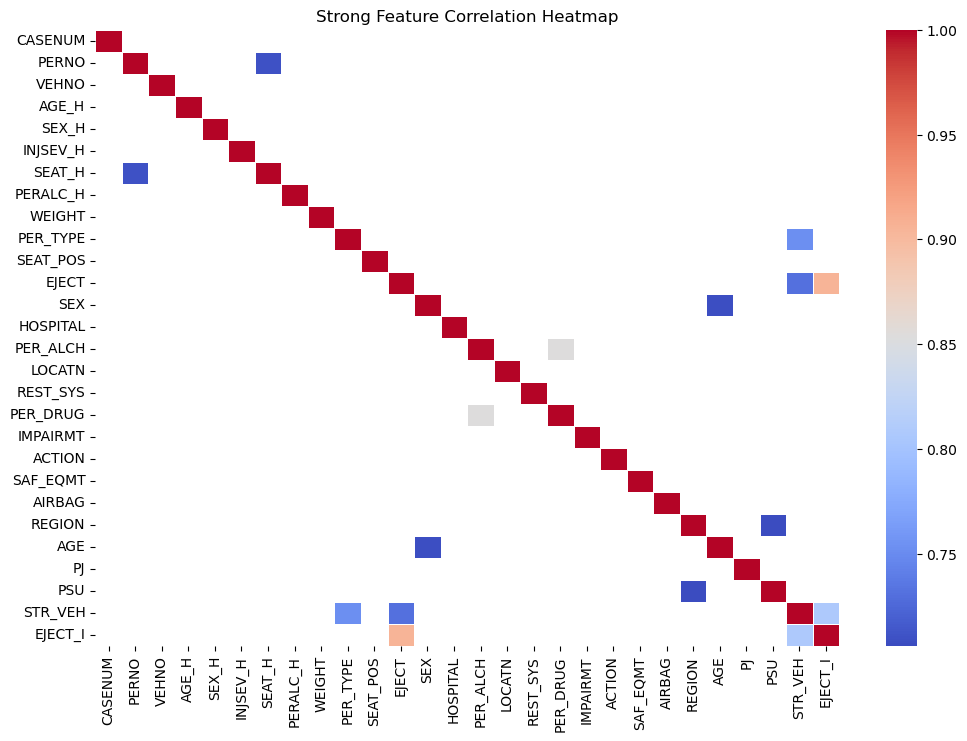

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a filtered correlation matrix with only strong correlations
correlation_threshold = 0.7
strong_corr_matrix = correlation_matrix[
    (correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)
].dropna(how="all", axis=0).dropna(how="all", axis=1)  # Remove rows & cols with all NaNs

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Strong Feature Correlation Heatmap")
plt.show()


In [21]:
# code to ignore correlated values 

correlated_columns = set()


for _, row in strong_correlations.iterrows():
    col1, col2 = row["Feature_1"], row["Feature_2"]
    correlated_columns.add(col2)  # Remove the second column in the pair to avoid redundancy

# Drop correlated columns from train_vehicle
train_person_cleaned = train_person.drop(columns=correlated_columns)

# Display remaining columns
print("Remaining columns after removing correlated ones:", train_person_cleaned.columns)


Remaining columns after removing correlated ones: Index(['CASENUM', 'PERNO', 'VEHNO', 'AGE_H', 'SEX_H', 'INJSEV_H', 'PERALC_H',
       'WEIGHT', 'PER_TYPE', 'SEAT_POS', 'EJECT', 'SEX', 'HOSPITAL',
       'PER_ALCH', 'LOCATN', 'REST_SYS', 'IMPAIRMT', 'ACTION', 'SAF_EQMT',
       'AIRBAG', 'REGION', 'PJ'],
      dtype='object')


In [22]:
train_person_cleaned.shape

(114486, 22)

In [23]:
print(train_person_cleaned.shape)
train_person_cleaned.to_csv("cleaned_data/person.csv",index=False)

(114486, 22)
